In [1]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd                                                         
import matplotlib.pyplot as plt                                            
import matplotlib as mpl                                                    
mpl.rcParams['axes.unicode_minus'] = False                                  
#plt.rcParams('font.family') = 'RIDIBatang'                          
#plt.rcParams('font.size') = 16                                             
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\RIDIBatang.otf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'RIDIBatang')
plt.rc('font', size = 16)
import seaborn as sns                                                       


***
데이터 획득
***

In [2]:
#Player(선수이름), Pos(포지션), 3P(3점슛), 2P(2점슛), TRB(리바운드), AST(어시스트), STL(스틸),	BLK(블록슛)
df = pd.read_csv('./basketball_stat.csv')
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [3]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

***
데이터 시각화
***

<Figure size 800x600 with 0 Axes>

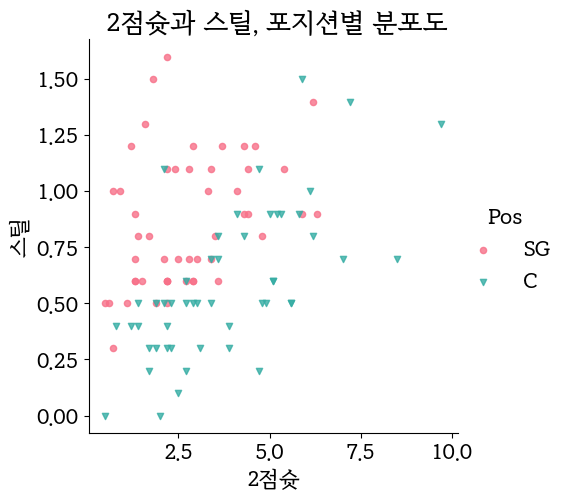

<Figure size 800x600 with 0 Axes>

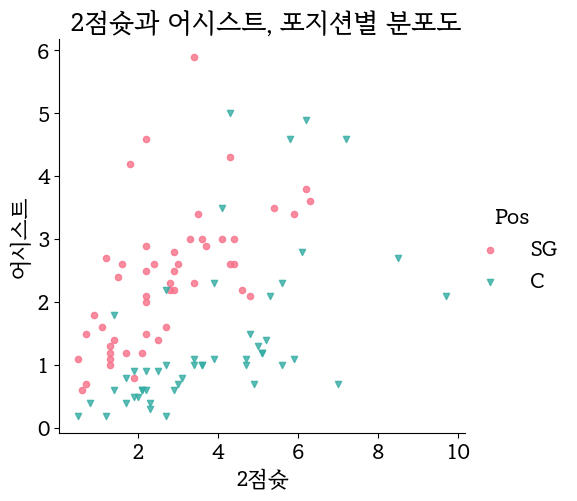

In [4]:
#  2P(2점슛)와 STL(스틸),  2P(2점슛)와 AST(어시스트) Pos(포지션)별 분포도를 출력한다.
plt.figure(figsize=[8, 6])
sns.lmplot(
    data=df, x='2P', y='STL', fit_reg=False, #데이터, x축, y축, 회귀선 표시 여부
    hue='Pos', # 그래프에 표시되는 표식의 색상 -> 범례가 자동으로 표시된다.
    scatter_kws={'s':20}, # 그래프에 표시되는 표식의 크기
    markers=['o','v'],
    palette='husl'
)
plt.title(' 2점슛과 스틸, 포지션별 분포도')
plt.xlabel('2점슛')
plt.ylabel('스틸')
#---------------------------------------------------------
plt.figure(figsize=[8, 6])
sns.lmplot(
    data=df, x='2P', y='AST', fit_reg=False,
    hue='Pos', 
    scatter_kws={'s':20},
    markers=['o','v'],
    palette='husl'
)
plt.title(' 2점슛과 어시스트, 포지션별 분포도')
plt.xlabel('2점슛')
plt.ylabel('어시스트')
plt.show()

<Figure size 800x600 with 0 Axes>

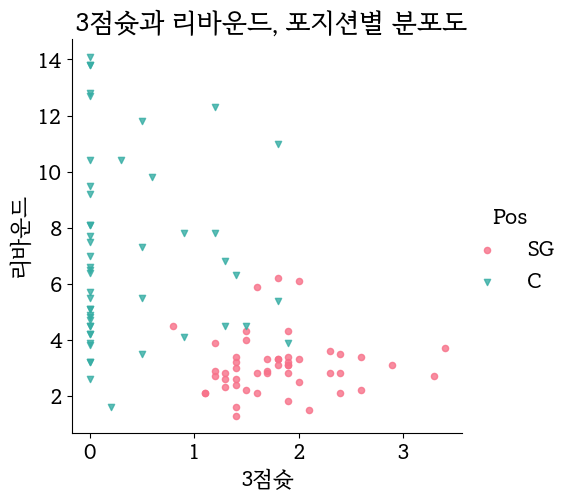

<Figure size 800x600 with 0 Axes>

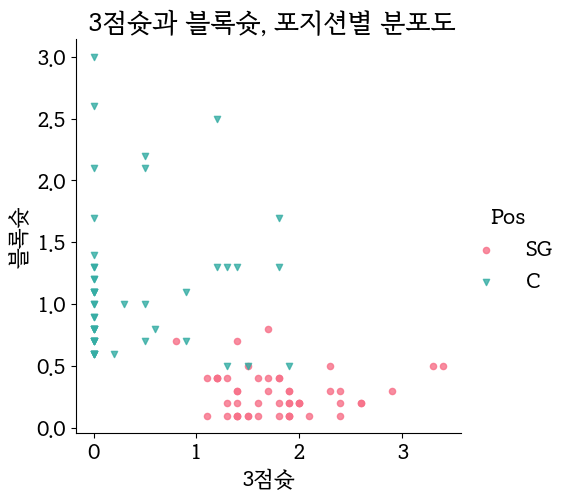

In [5]:
#  3P(3점슛)와 TRB,  3P와 BLK Pos(포지션)별 분포도를 출력한다.
plt.figure(figsize=[8, 6])
sns.lmplot(
    data=df, x='3P', y='TRB', fit_reg=False, 
    hue='Pos', 
    scatter_kws={'s':20},
    markers=['o','v'],
    palette='husl'
)
plt.title(' 3점슛과 리바운드, 포지션별 분포도')
plt.xlabel('3점슛')
plt.ylabel('리바운드')
#---------------------------------------------------------
plt.figure(figsize=[8, 6])
sns.lmplot(
    data=df, x='3P', y='BLK', fit_reg=False,
    hue='Pos', 
    scatter_kws={'s':20},
    markers=['o','v'],
    palette='husl'
)
plt.title(' 3점슛과 블록슛, 포지션별 분포도')
plt.xlabel('3점슛')
plt.ylabel('블록슛')
plt.show()

***
데이터 전처리
***

In [6]:
# pandas의 drop() 메소드로 불필요한 컬럼(피쳐)를 삭제한다.
# drop() 메소드의 axis 속성은 생략시 기본값이 0으로 행 단위로 삭제하고, 1로 지정하면 열 단위로 삭제한다.
#df = df.drop(['2P', 'AST', 'STL'], axis=1)

#inplace 속성은 생략시 False가 기본값으로 실행 결과를 데이터프레임에 즉시 반영하지 않고,
#True를 적어주면 실행 결과를 데이터프레임에 즉시 반영한다.
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


***
학습(train) 데이터와 테스트(test) 데이터로 나누기
***

In [7]:
# 학습 데이터와 테스트 데이터의 비율을 지정해서 무작위로 분리하기 위해 import 한다.
from sklearn.model_selection import train_test_split
# 교차검증을 실행하기 위해서 import 한다.
from sklearn.model_selection import cross_val_score
# kNN 분류기를 사용하기 위해서 import 한다.
from sklearn.neighbors import KNeighborsClassifier
# 모델의 정확도를 게산하기 위해 import 한다.
from sklearn.metrics import accuracy_score

In [8]:
# train_test_split() 메소드는 학습 데이터와 테스트 데이터를 지정한 비율로 나누는 기능을 실행한다.
# train_test_split(데이터[, train_size, test_size])
# train_size 옵션으로 학습 데이터의 비율을 지정하고, test_size 옵션으로 테스트 데이터의 비율을 지정한다.
# 학습 데이터와 테스트 데이터의 비율을 지정하지 않으면 학습 데이터 75%, 테스트 데이터 25% 비율로 나눈다.
# random_state 옵션을 지정하면 매번 같은 데이터를 학습 데이터와 테스트 데이터로 나눈다.
# shuffle 옵션을 False로 지정하면 학습 데이터와 테스트 데이터로 나눌 때 섞지 않고 나눈다.
train, test = train_test_split(df, train_size=0.8, test_size=0.2)
print(train.shape[0], test.shape[0])

80 20


***
최적의 kNN 파라미터 찾기
***
sklearn 라이브러리의 cross_val_score() 메소드로 k-fold 교차 검증을 사용해서 kNN 알고리즘의 조절 가능한 단 하나의 변수값 k를 찾는다.  
k-fold 교차 검증은 train 데이터를 k개로 나눠서 k번 정확도를 검증하는 방법이다.

<img src="./교차검증.png">

In [9]:
# 최적의 k를 찾기위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 갯수의 절반까지 홀수로 지정한다.
k_list = []
for i in range(3, (train.shape[0] // 2), 2):
    k_list.append(i)
print(k_list)
    

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


In [10]:
# 각각의 k변 10-fold 교차 검증 결과의 평균을 기억할 빈 리스트를 선언한다.
cross_validation_scores = []
# train_test_split() 메소드로 분리한 train 데이터에서 학습에 사용할 데이터(피쳐)를 저장한다.
x_train = train[['3P', 'TRB', 'BLK']]
# train_test_split() 메소드로 분리한 train 데이터에서 학습 결과를 사용할 데이터(실제값, 레이블, 클래스, 타겟)를 저장한다.
y_train = train['Pos']

***
10-fold 교차 검증
***
train 데이터를 10개의 조각으로 나누고 1조각을 검증(validation)데이터로 사용하고 나머지 9조각을 학습 데이터로 사용해서  
1번째 조각부터 10번째 조각까지 1번의 검증하고 10번의 검증 결과를 10으로 나눈 평균을 검증 결과 점수로 한다.

cross_val_score(modal, x, y, scoring, cv)  
- model : 분석 모델
- x : 독립 변수, 학습 데이터(피쳐)
- y : 종속 변수, 학습 데이터의 학습 결과(실제값, 레이블, 클래스, 타겟)
- scoring : 성능 검증에 사용할 평가 지표, 정확도를 의미하는 'accuracy'를 지정한다.
- cv : 교차 검증 조각의 갯수

In [11]:
# 10-fold 교차 검증을 k_list에 저장된 각각의 값을 대상으로 실행해 검증 결과를 저장한다.
for k in k_list:
    # KNeighborsClassifier 클래스의 n_neighbor에 kNN모델에서 사용할 이웃의 갯수를 지정해 kNN 모델을 만든다.
    knn = KNeighborsClassifier(n_neighbors=k) #분석모델
    # 학습에 따른 결과(실제값, 레이블, 타겟)는 1차원 형태로 지정해야 하므로 values.ravel() 메소드를 사용해서
    # 1차원으로 변경한다.
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), scoring='accuracy', cv=10)
    cross_validation_scores.append(scores.mean())
    print('k -> {:2d}, scores -> {}, mean -> {}'.format (k, scores, scores.mean())) #cv -> 10-fold
    

k ->  3, scores -> [0.875 0.875 0.875 1.    1.    0.875 0.875 1.    1.    0.75 ], mean -> 0.9125
k ->  5, scores -> [0.875 0.75  0.875 0.875 0.875 0.875 0.875 1.    0.875 0.625], mean -> 0.85
k ->  7, scores -> [1.    0.75  0.875 0.875 0.875 0.875 1.    1.    0.875 0.625], mean -> 0.875
k ->  9, scores -> [1.    0.75  0.875 0.875 1.    0.875 1.    1.    0.875 0.75 ], mean -> 0.9
k -> 11, scores -> [1.    0.75  0.875 0.875 1.    0.875 0.875 1.    0.875 0.75 ], mean -> 0.8875
k -> 13, scores -> [1.    0.75  0.875 0.875 1.    0.875 0.875 1.    0.875 0.75 ], mean -> 0.8875
k -> 15, scores -> [1.    0.75  0.875 0.875 1.    0.75  0.875 1.    0.875 0.75 ], mean -> 0.875
k -> 17, scores -> [1.    0.75  0.875 0.875 1.    0.75  0.875 1.    0.875 0.625], mean -> 0.8625
k -> 19, scores -> [1.    0.75  0.875 0.875 1.    0.75  0.875 1.    0.875 0.625], mean -> 0.8625
k -> 21, scores -> [0.875 0.75  0.875 0.875 1.    0.75  0.875 1.    0.875 0.625], mean -> 0.85
k -> 23, scores -> [0.875 0.75  0.875 0

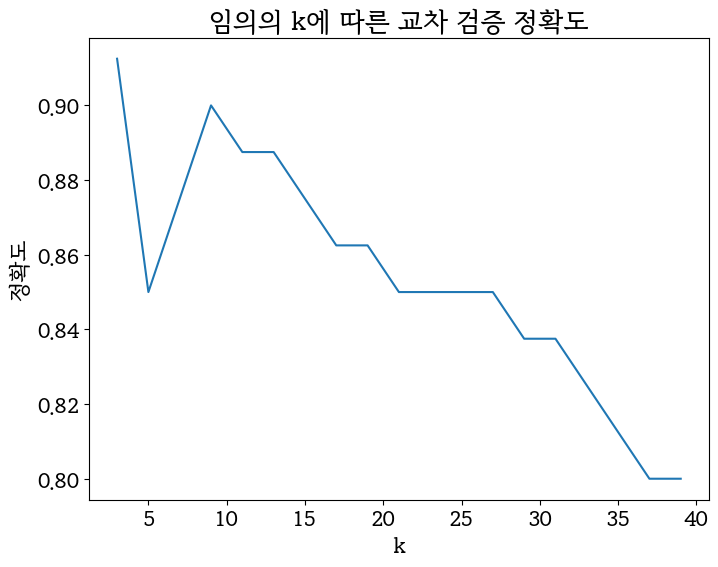

In [12]:
plt.figure(figsize=[8, 6])
plt.plot(k_list, cross_validation_scores)
plt.title('임의의 k에 따른 교차 검증 정확도')
plt.xlabel('k')
plt.ylabel('정확도')
plt.show()

In [13]:
# 예측율이 가장 높은 k을 선정한다.
print(cross_validation_scores)
print(max(cross_validation_scores))
# index() 메소드는 인수로 지정된 값이 최초로 출력되는 인덱스를 출력한다.
optimal_k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('최적의 K : {}'.format (optimal_k))

[0.9125, 0.85, 0.875, 0.9, 0.8875, 0.8875, 0.875, 0.8625, 0.8625, 0.85, 0.85, 0.85, 0.85, 0.8375, 0.8375, 0.825, 0.8125, 0.8, 0.8]
0.9125
최적의 K : 3


***
최적의 k를 사용한 kNN 모델 테스트
***

In [14]:
#  분별력이 있다고 판단된 3P, TRB, BLK 피쳐로 모델을 학습시킨 후 테스트를 진행한다. 
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# 모델 학습에 사용할 피쳐와 타겟을 지정한다.
x_train = train[['3P', 'TRB', 'BLK']]
y_train = train['Pos']

# 피쳐(x_train)와 타겟(y_train)를 이용해 모델을 학습시킨다.
knn.fit(x_train, y_train.values.ravel()) # fit ; 학습할 때 사용

# 모델 최종 테스트에 사용할 피쳐와 타겟을 지정한다.
x_test = test[['3P', 'TRB', 'BLK']]
y_test = test['Pos']

# 테스트 데이터를 사용해 예측해보고 모델의 정확도를 계산한다.
# predict() 메소드의 인수로 테스트 테이터의 피쳐를 넘겨서 테스트의 예측값을 얻어온다. ; 예측할 때 사용
predict = knn.predict(x_test) # 테스트 데이터 예측
#accuracy_score() 메소드의 인수로 테스트 데이터의 타겟과 테스트 데이터의 예측값을 넘겨
#모델의 정확도를 얻어온다.
accuracy = accuracy_score(y_test.values.ravel(), predict)
print('정확도 ->  {:6.2%}'.format(accuracy))


정확도 ->  100.00%


In [15]:
pd.DataFrame({ '실제값' : y_test.values.ravel(), '예측값' : predict})

,실제값,예측값
0,SG,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,C,C
8,SG,SG
9,SG,SG


***
완성된 모델 사용하기
***

In [16]:
x = {'3P' : [0, 3.9], 'TRB' : [1, 0.1], 'BLK' : [7.7, 0.3]}
x_test = pd.DataFrame(x)
x_test

,3P,TRB,BLK
0,0.0,1.0,7.7
1,3.9,0.1,0.3


In [17]:
y = {'Pos' : ['C', 'SG']}
y_test = pd.DataFrame(y)
y_test

,Pos
0,C
1,SG


In [18]:
predict = knn.predict(x_test)#예측치
print(predict)
accuracy = accuracy_score(y_test.values.ravel(), predict)
print('정확도 ->  {:6.2%}'.format(accuracy))
values = pd.DataFrame({ '실제값' : y_test.values.ravel(), '예측값' : predict})
values

['C' 'SG']
정확도 ->  100.00%


,실제값,예측값
0,C,C
1,SG,SG
